In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle


In [2]:
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [3]:
#rating_data = pd.read_csv('../Data/ratings.csv',parse_dates=True,index_col='timestamp',date_parser=dateparse)
rating_data = pd.read_csv('../Data/ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
rating_data.sort_values(by='timestamp').head()

,userId,movieId,rating,timestamp
66719,429,595,5.0,828124615
66716,429,588,5.0,828124615
66717,429,590,5.0,828124615
66718,429,592,5.0,828124615
66712,429,432,3.0,828124615


In [5]:
# rating_data.loc[rating_data['userId']==514].sort_values(by='timestamp').head()

In [6]:
len(rating_data['userId'].unique())

610

In [7]:
# index_split = round(len(rating_data)*0.75)
# train_rating_data = rating_data[:index_split].copy()
# test_rating_data = rating_data[index_split:].copy()

In [8]:
# train_rating_data.head()

In [9]:
# test_rating_data.head()

In [10]:
movies = pd.read_csv('../Data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
rating_dist = rating_data['rating'].value_counts()
list(rating_dist.index)

[4.0, 3.0, 5.0, 3.5, 4.5, 2.0, 2.5, 1.0, 1.5, 0.5]

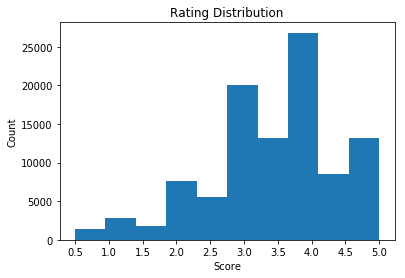

In [12]:
plt.hist(rating_data['rating'])
plt.title('Rating Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(np.arange(0.5, 5.5, 0.5));

In [13]:
users = list(rating_data['userId'].unique())
items = list(rating_data['movieId'].unique())

def movie_id_to_name(mid):
    return movies.loc[movies['movieId']==mid].title
movie_id_to_name(1371)

1054    Star Trek: The Motion Picture (1979)
Name: title, dtype: object

In [16]:
from surprise import Dataset
from surprise import Reader

from surprise import SVD
from surprise import accuracy

from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

In [17]:
#reader = Reader(rating_scale= (0.5,5))
reader = Reader(rating_scale= (0.5,5),line_format='user item rating timestamp',sep=',')
data_full = Dataset.load_from_df(rating_data[['userId','movieId','rating']], reader=reader)
data_full

In [18]:
from surprise import SVD
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

svd_model = SVD(n_epochs=20,lr_all=0.005,reg_all=0.02,verbose=False)
cross_validate(svd_model, data_full, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8687  0.8734  0.8686  0.8802  0.8786  0.8739  0.0049  
MAE (testset)     0.6666  0.6712  0.6693  0.6749  0.6750  0.6714  0.0032  
Fit time          5.72    5.61    5.42    5.48    5.51    5.55    0.10    
Test time         0.23    0.19    0.16    0.16    0.22    0.19    0.03    


{'test_rmse': array([0.86871169, 0.87338766, 0.8685672 , 0.8802284 , 0.87862283]),
 'test_mae': array([0.66659679, 0.67115282, 0.66933955, 0.67487976, 0.67504424]),
 'fit_time': (5.717438697814941,
  5.608064889907837,
  5.4205944538116455,
  5.483118295669556,
  5.509018659591675),
 'test_time': (0.2342970371246338,
  0.18748164176940918,
  0.15618896484375,
  0.1562178134918213,
  0.218703031539917)}

In [19]:
trainset, testset = train_test_split(data_full, train_size=0.75,shuffle=True)

svd_model = SVD(n_epochs=20,lr_all=0.005,reg_all=0.02,verbose=False)
svd_model.fit(trainset)

In [20]:
predictions = svd_model.test(testset)
accuracy.rmse(predictions),accuracy.mae(predictions)

RMSE: 0.8740
MAE:  0.6709


(0.87397383911452, 0.6709151726347757)

In [22]:
#trainset

In [ ]:
# predictions

In [ ]:
# trainset.ur

In [ ]:
# for rating in trainset.all_ratings():
#     print(rating)

In [ ]:
# # save the model to disk
# filename = '../pickle_models/svd_first_model.sav'
# pickle.dump(svd_model, open(filename, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))
# loaded_

In [23]:
param_grid1 = {'n_epochs': [5,10], 'lr_all': [0.002, 0.005,0.007], 'reg_all': [0.02,0.04, 0.06]}

In [24]:
gs1 = GridSearchCV(SVD, param_grid1, measures=['mae',"rmse"], cv=5, refit=True)

In [25]:
gs1.fit(data_full)

In [26]:
gs1.best_score

{'mae': 0.6732588799581599, 'rmse': 0.8746324066977664}

In [27]:
gs1.best_params

{'mae': {'n_epochs': 10, 'lr_all': 0.007, 'reg_all': 0.06},
 'rmse': {'n_epochs': 10, 'lr_all': 0.007, 'reg_all': 0.06}}

In [28]:
gs1.best_estimator

{'mae': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x1569da402e8>,
 'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x1569da40198>}

In [29]:
best_model = SVD(n_epochs=gs1.best_params['mae']['n_epochs'],
                 lr_all=gs1.best_params['mae']['lr_all'],
                 reg_all=gs1.best_params['mae']['reg_all'],
                 verbose=False)
best_model.fit(data_full.build_full_trainset())
best_predictions = best_model.test(data_full.build_full_trainset().build_anti_testset())


In [30]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [31]:
# # First train an SVD algorithm on the movielens dataset.
# trainset = data_sp.build_full_trainset()
# best_model = SVD(n_epochs=gs1.best_params['rmse']['n_epochs'],lr_all=gs1.best_params['rmse']['lr_all'],reg_all=gs1.best_params['rmse']['reg_all'],verbose=False)
# best_model.fit(trainset)

# # Than predict ratings for all pairs (u, i) that are NOT in the training set.
# testset = trainset.build_anti_testset()
# predictions = best_model.test(testset)

In [32]:
top_n = get_top_n(best_predictions, n=5)

In [33]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [318, 750, 858, 7361, 1204]
2 [296, 750, 1204, 904, 5618]
3 [3468, 1204, 50, 922, 1213]
4 [750, 318, 1204, 1221, 858]
5 [1204, 858, 5690, 2019, 1199]
6 [1204, 1262, 750, 1196, 904]
7 [858, 904, 318, 1228, 246]
8 [48516, 904, 2959, 1235, 858]
9 [318, 296, 50, 750, 48516]
10 [1262, 750, 741, 1136, 1233]
11 [858, 1221, 904, 1136, 5618]
12 [50, 356, 1089, 1208, 1213]
13 [2959, 1104, 318, 1204, 48516]
14 [57669, 912, 2324, 48516, 750]
15 [2324, 48516, 912, 750, 3451]
16 [2160, 1204, 1250, 1104, 1221]
17 [778, 1204, 908, 3275, 1208]
18 [750, 1204, 912, 5618, 1199]
19 [750, 1204, 318, 858, 1199]
20 [318, 1204, 1196, 951, 1237]
21 [318, 1204, 1276, 741, 1262]
22 [1204, 1199, 904, 112552, 296]
23 [318, 2959, 1204, 2329, 908]
24 [2959, 1104, 858, 904, 750]
25 [50, 296, 1213, 2959, 318]
26 [318, 750, 3275, 2959, 1276]
27 [741, 318, 1204, 1136, 3147]
28 [1204, 750, 904, 4973, 1262]
29 [912, 1252, 2959, 1276, 1089]
30 [296, 1136, 2959, 908, 1203]
31 [750, 318, 2959, 858, 260]
32 [858, 904, 750, 1

In [34]:
preds = pd.DataFrame(best_predictions)
preds['err']=abs(preds['r_ui']-preds['est'])
preds

,uid,iid,r_ui,est,details,err
0,1,318,3.501557,5.000000,{'was_impossible': False},1.498443
1,1,1704,3.501557,4.866978,{'was_impossible': False},1.365422
2,1,6874,3.501557,4.769687,{'was_impossible': False},1.268130
3,1,8798,3.501557,4.442533,{'was_impossible': False},0.940976
4,1,46970,3.501557,4.121592,{'was_impossible': False},0.620035
5,1,48516,3.501557,4.939297,{'was_impossible': False},1.437740
6,1,58559,3.501557,4.904117,{'was_impossible': False},1.402560
7,1,60756,3.501557,4.315414,{'was_impossible': False},0.813858
8,1,68157,3.501557,4.825851,{'was_impossible': False},1.324294
9,1,71535,3.501557,4.618354,{'was_impossible': False},1.116797


In [35]:
best_model.fit(data_sp.build_full_trainset())
best_model.predict(uid=str(1),iid=str(1))

NameError: name 'data_sp' is not defined

In [ ]:
best_model.predict(uid=str(1),iid=str(3))

In [ ]:
from surprise import SVDpp

svdpp_model = SVDpp(n_epochs=5,lr_all=0.005,reg_all=0.02,verbose=False)
cross_validate(svd_model, data_sp, measures=['RMSE', 'MAE'], cv=5, verbose=True)

In [ ]:
param_grid2 = {'n_epochs': [5,8], 'lr_all': [0.002, 0.005,0.007], 'reg_all': [0.02,0.04, 0.06]}
gs2 = GridSearchCV(SVDpp, param_grid2, measures=['fcp',"rmse"], cv=5, refit=True)

In [ ]:
gs2.fit(data_sp)

In [ ]:
gs2.best_score

In [ ]:
gs2.best_params